## Introdução
Este projeto tem como objetivo realizar uma análise experimental detalhada utilizando técnicas de aprendizado de máquina para prever sobreviventes do desastre do Titanic, utilizando o famoso dataset "Titanic - Machine Learning from Disaster". O foco principal será na variação de parâmetros essenciais no treinamento de modelos, garantindo uma abordagem sistemática e rigorosa para otimizar o desempenho preditivo.

Objetivos do Projeto
- Explorar e comparar diferentes configurações de redes neurais, incluindo variações no número de camadas intermediárias (1 ou 2), inicialmente optando por redes menores para evitar - complexidade desnecessária.
- Investigar o impacto de diferentes taxas de aprendizagem, funções de ativação e otimizadores nos resultados preditivos.
- Garantir que os dados estejam normalizados para facilitar o treinamento e melhorar a convergência dos modelos (usando normalização Min-Max quando necessário).
- Avaliar o desempenho dos modelos utilizando métricas padrão como Acurácia, Precision e Recall.
- Documentar todos os experimentos de forma clara e reproducível, entregando tanto o notebook Jupyter quanto o relatório em PDF com análises detalhadas e conclusões.
- Participantes do Projeto

#### **Este projeto é realizado pelos seguintes participantes**:

- Alberto Guevara (agaf2)
- Felipe Ferreira da Silva Santos (ffss)      
- Heitor de Assis Machado (ham5)
- João Victor Lopes (jvcl)
- Matheus Veras Batista (mvb2)

### 1º Passo: Preparar os dados

## 1.1 Import Libraries


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## 1.2 Processamento dos dados
Esta é a etapa de conhecer e cumprimentar. Conheça seus dados pelo primeiro nome e aprenda um pouco sobre eles. Como ele é (tipo de dados e valores), o que o faz funcionar (variáveis independentes/características), quais são seus objetivos na vida (variáveis dependentes/alvo). Pense nisso como um primeiro encontro, antes de começar a cutucá-lo no quarto.

Para começar essa etapa, primeiro importamos nossos dados. Em seguida, usamos a função info() e sample() para obter uma visão geral rápida e suja dos tipos de dados das variáveis (ou seja, qualitativo vs. quantitativo). Clique aqui para obter o Dicionário de dados de origem.

  1. A variável Survived é nosso resultado ou variável dependente. É um tipo de dado nominal binário de 1 para sobrevivente e 0 para não sobrevivente. Todas as outras variáveis são possíveis variáveis preditoras ou independentes. É importante observar que o fato de haver mais variáveis preditoras não torna um modelo melhor, mas sim as variáveis certas.

  2. Presume-se que as variáveis PassengerID e Ticket sejam identificadores aleatórios exclusivos, que não têm impacto sobre a variável de resultado. Portanto, elas serão excluídas da análise.

  3. A variável Pclass é um tipo de dado ordinal para a classe do bilhete, um substituto para o status socioeconômico (SES), representando 1 = classe alta, 2 = classe média e 3 = classe baixa.

  4. A variável Name é um tipo de dado nominal. Ela poderia ser usada na engenharia de recursos para derivar o gênero do título, o tamanho da família do sobrenome e o SES de títulos como médico ou mestre. Como essas variáveis já existem, vamos usá-las para ver se o título, como mestre, faz diferença.

  5. As variáveis Sexo e Embarcado são um tipo de dado nominal. Elas serão convertidas em variáveis fictícias para cálculos matemáticos.

  6. As variáveis Age e Fare são tipos de dados quantitativos contínuos.

  7. A variável SibSp representa o número de irmãos/cônjuges relacionados a bordo e a variável Parch representa o número de pais/filhos relacionados a bordo. Ambas são tipos de dados quantitativos discretos. Isso pode ser usado para engenharia de recursos para criar um tamanho de família e é uma variável isolada.

  8. A variável Cabin é um tipo de dado nominal que pode ser usado na engenharia de recursos para obter a posição aproximada no navio quando o incidente ocorreu e o SES dos níveis de convés. Entretanto, como há muitos valores nulos, ela não agrega valor e, portanto, é excluída da análise.

In [20]:
#Ler arquivo direto do repositório do github
!wget https://raw.githubusercontent.com/jvlopess/Titanic-ML-Experiment-IF684EC/main/data/train.csv?token=GHSAT0AAAAAACNAA4767BNFRZ3PUI5M3ZLYZUERPYA

!wget https://raw.githubusercontent.com/jvlopess/Titanic-ML-Experiment-IF684EC/main/data/test.csv?token=GHSAT0AAAAAACNAA476EP6LWWDWC7XCNEG2ZUESTTA

--2024-07-02 23:01:54--  https://raw.githubusercontent.com/jvlopess/Titanic-ML-Experiment-IF684EC/main/data/train.csv?token=GHSAT0AAAAAACNAA4767BNFRZ3PUI5M3ZLYZUERPYA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv?token=GHSAT0AAAAAACNAA4767BNFRZ3PUI5M3ZLYZUERPYA.3’

train.csv?token=GHS 100%[===================>]  59.76K  --.-KB/s    in 0.004s  

2024-07-02 23:01:54 (14.8 MB/s) - ‘train.csv?token=GHSAT0AAAAAACNAA4767BNFRZ3PUI5M3ZLYZUERPYA.3’ saved [61194/61194]

--2024-07-02 23:01:54--  https://raw.githubusercontent.com/jvlopess/Titanic-ML-Experiment-IF684EC/main/data/test.csv?token=GHSAT0AAAAAACNAA476EP6LWWDWC7XCNEG2ZUESTTA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.

In [26]:
# Tratamento dos Dados
data_raw = pd.read_csv('train.csv?token=GHSAT0AAAAAACNAA4767BNFRZ3PUI5M3ZLYZUERPYA')

#to play with our data we'll create a copy
data1 = data_raw.copy(deep = True)

#Dados de teste
data_val = pd.read_csv('test.csv?token=GHSAT0AAAAAACNAA476EP6LWWDWC7XCNEG2ZUESTTA')

data_cleaner = [data1]

print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S


## 1.21 Cleaning

In [27]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)


data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------


In [29]:
for dataset in data_cleaner:
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code to create age bands and determine correlations with survival
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]



    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)



#cleanup rare title names
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index


data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data1.sample(10)

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB


<ipython-input-29-6603b01439fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,39.6875,S,6,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
292,0,2,"Levy, Mr. Rene Jacques",male,36.00,0,0,12.8750,C,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
716,1,1,"Endres, Miss. Caroline Louise",female,38.00,0,0,227.5250,C,1,1,Miss,"(31.0, 512.329]","(32.0, 48.0]"
70,0,2,"Jenkin, Mr. Stephen Curnow",male,32.00,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
123,1,2,"Webber, Miss. Susan",female,32.50,0,0,13.0000,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
642,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,27.9000,S,6,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
593,0,3,"Bourke, Miss. Mary",female,28.00,0,2,7.7500,Q,3,0,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,19.2583,C,4,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
658,0,2,"Eitemiller, Mr. George Floyd",male,23.00,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
830,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,14.4542,C,2,0,Mrs,"(7.91, 14.454]","(-0.08, 16.0]"


## 2. Convertendo formatos

In [32]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x], drop_first=True)
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,True,False,True,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,False,False,True,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,False,False,True,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,True,False,True,False,False,True,False


In [52]:
# Dividir os dados em conjuntos de treinamento e teste
train1_x, test1_x, train1_y, test1_y = train_test_split(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(data1_dummy, data1[Target], random_state=0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


### Normalizar os dados

In [36]:
scaler = MinMaxScaler()

# Normalizar conjuntos de treinamento e teste para cada conjunto de características
train1_x = scaler.fit_transform(train1_x)
test1_x = scaler.transform(test1_x)

train1_x_bin = scaler.fit_transform(train1_x_bin)
test1_x_bin = scaler.transform(test1_x_bin)

train1_x_dummy = scaler.fit_transform(train1_x_dummy)
test1_x_dummy = scaler.transform(test1_x_dummy)


# Step 4: Perform Exploratory Analysis with Statistics

In [38]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')


print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

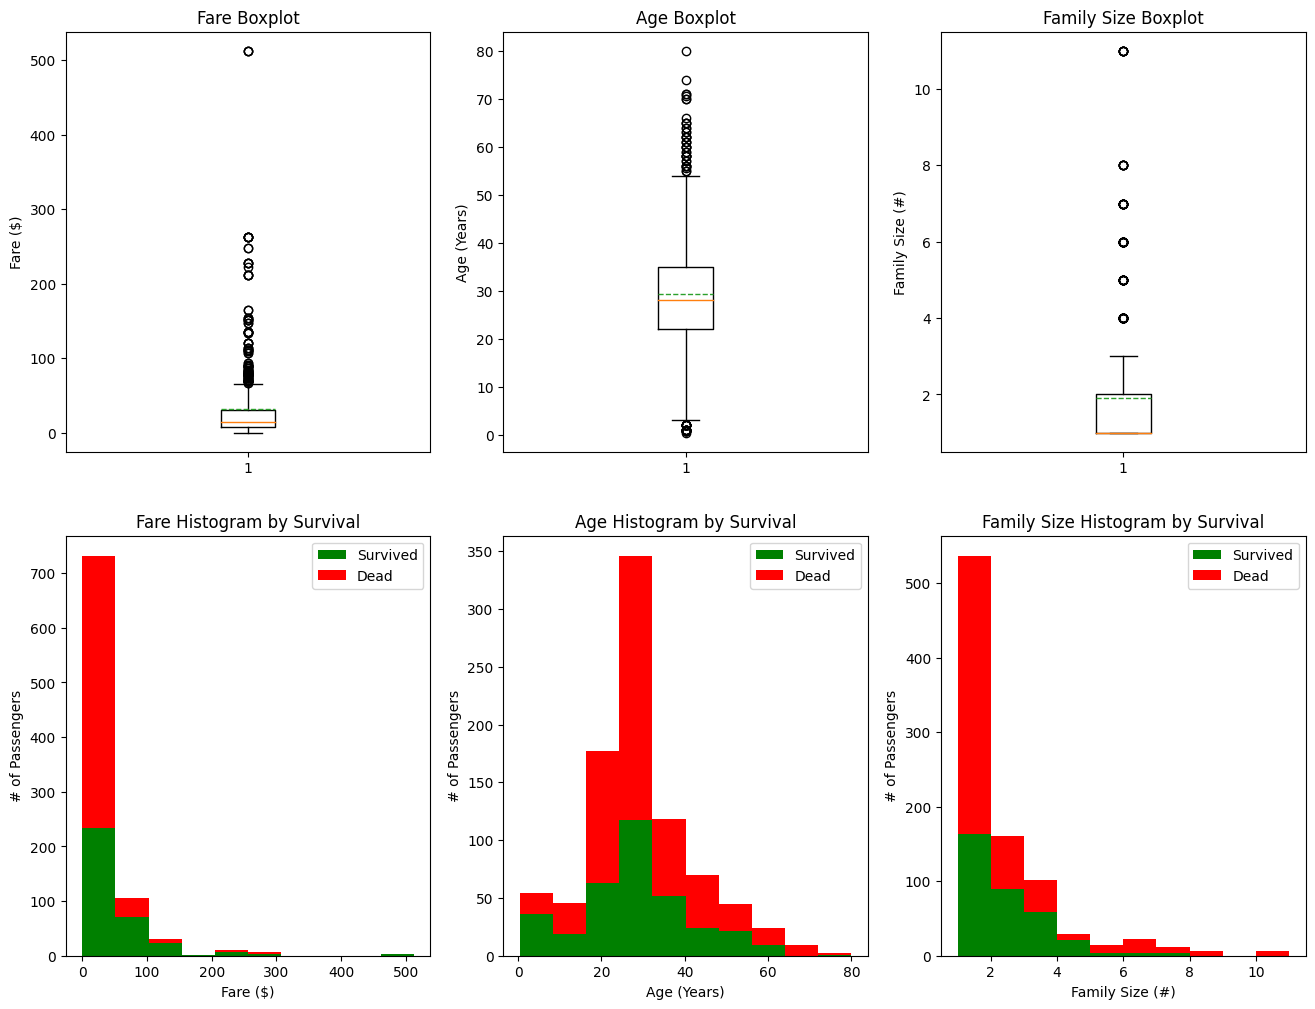

In [39]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']],
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<Axes: xlabel='FamilySize', ylabel='Survived'>

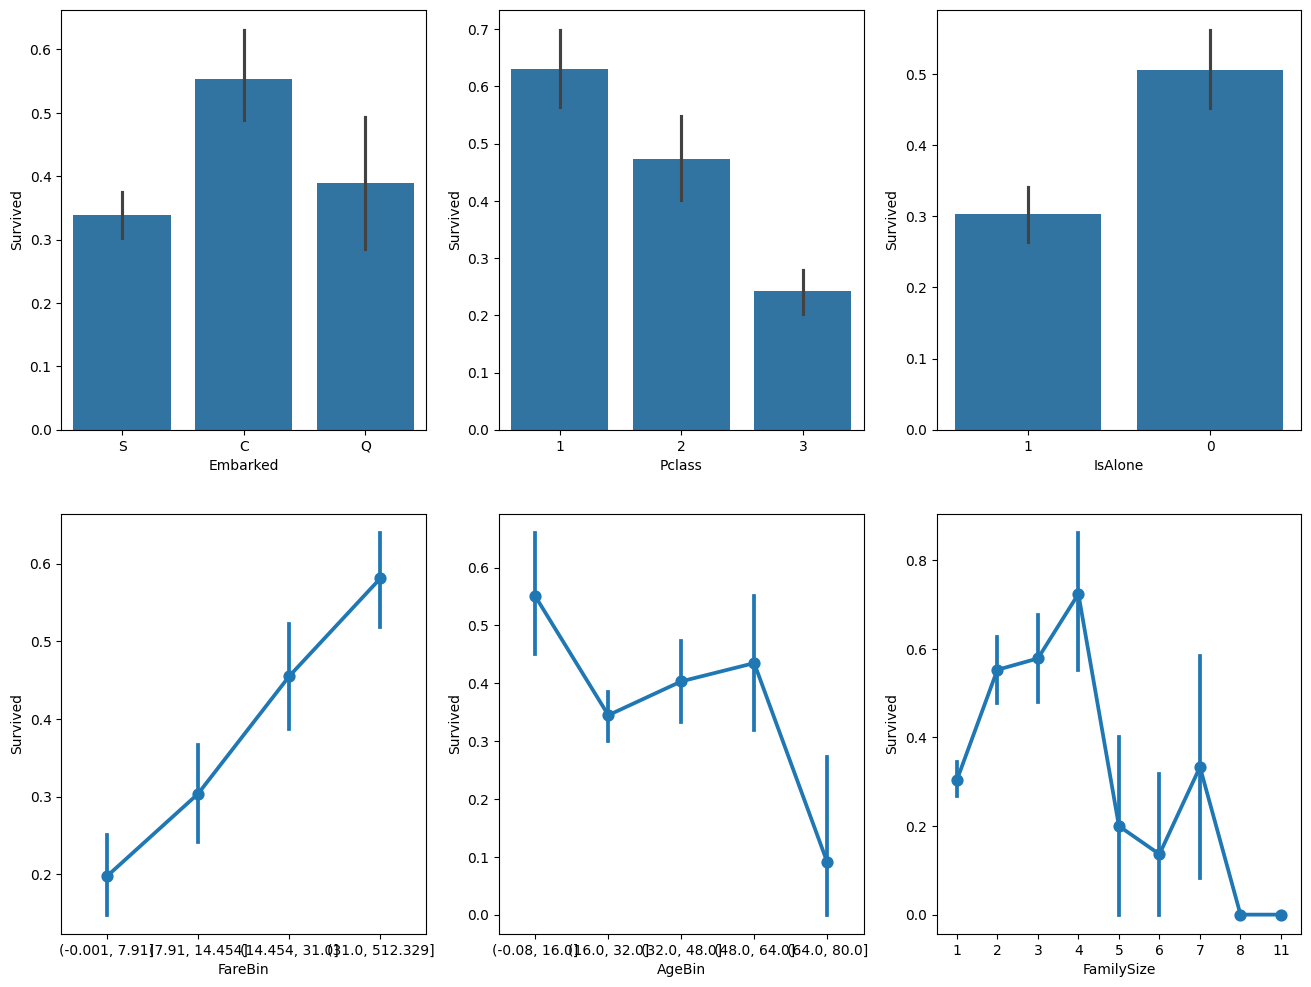

In [40]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

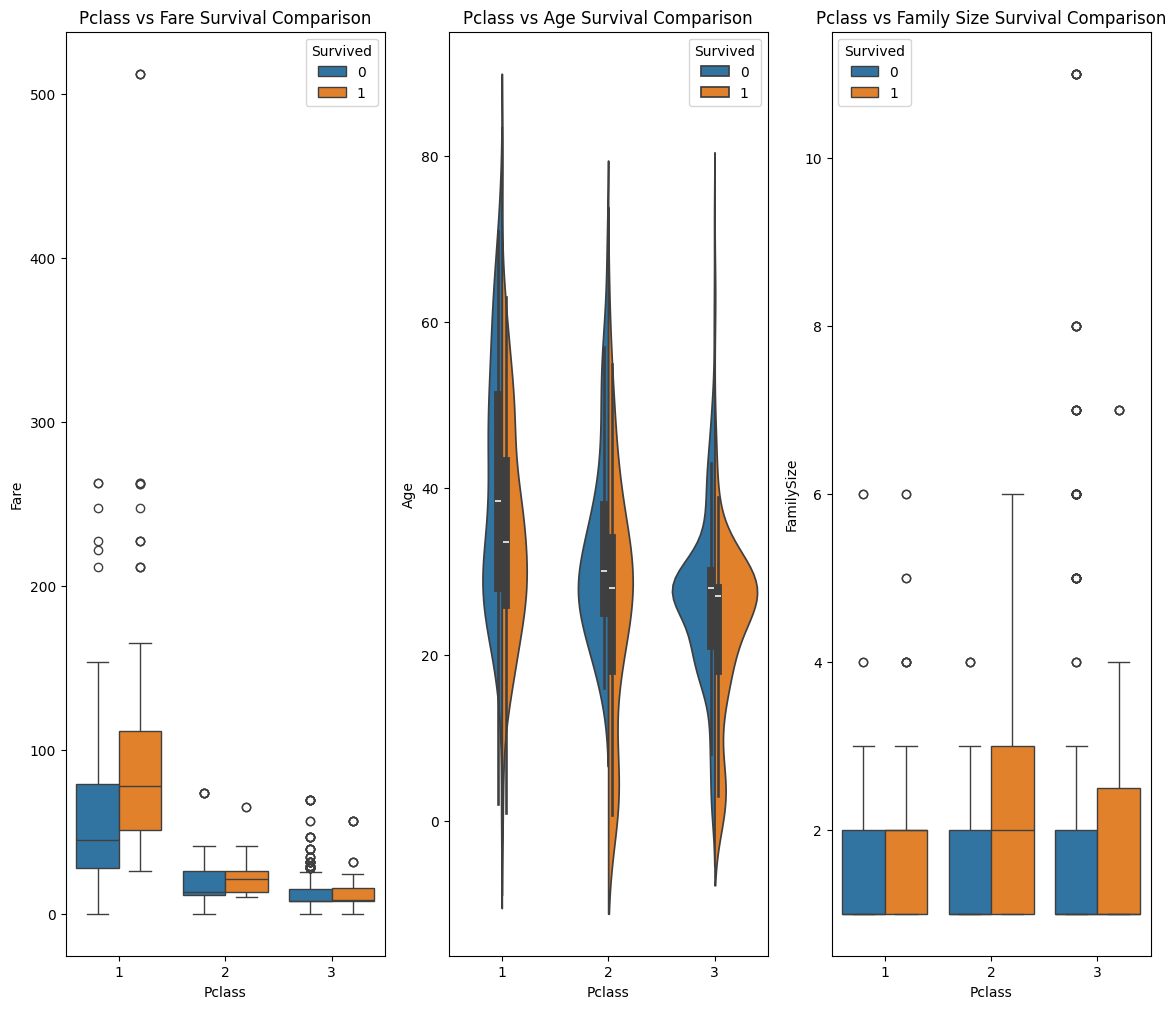

In [41]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

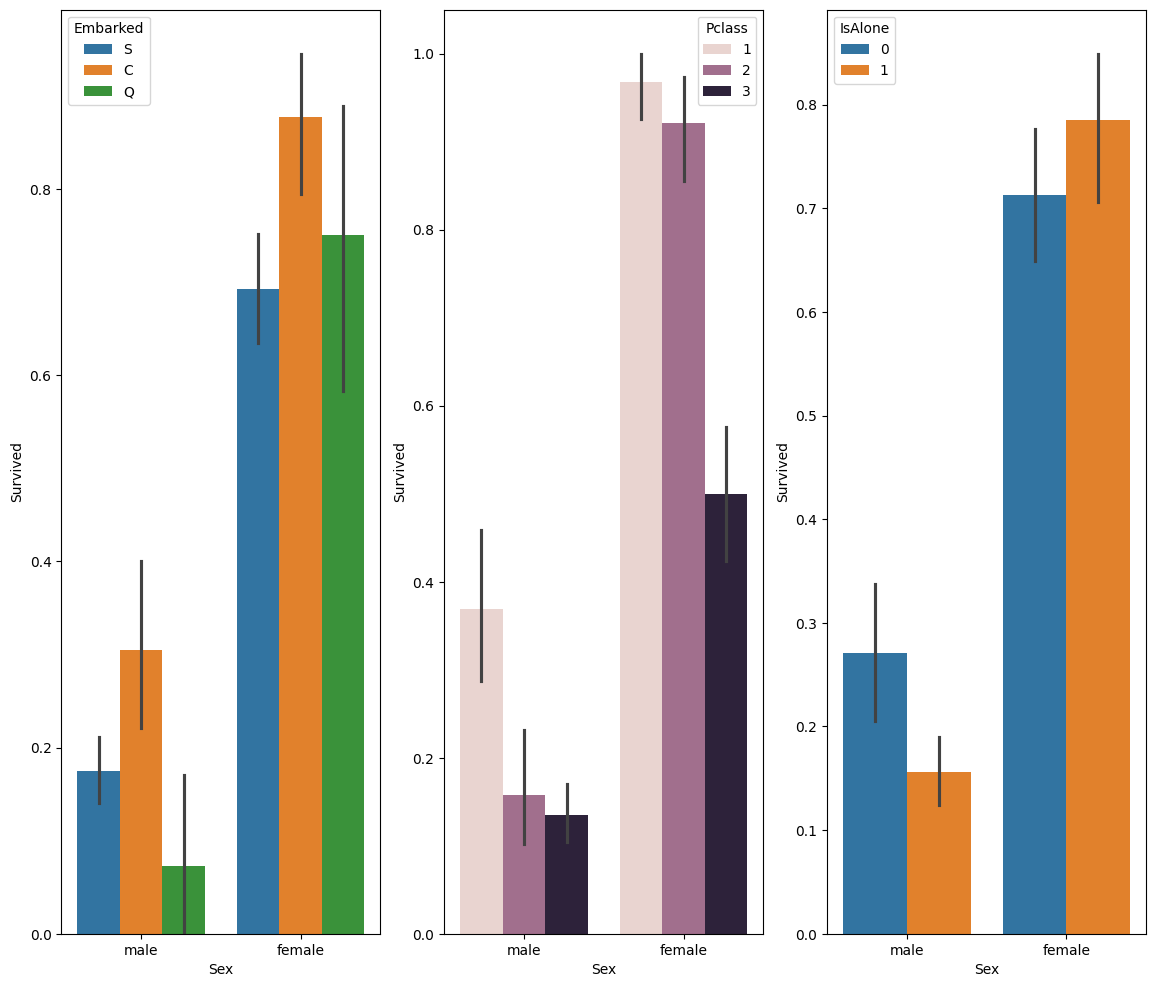

In [42]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

<Axes: xlabel='Pclass', ylabel='Survived'>

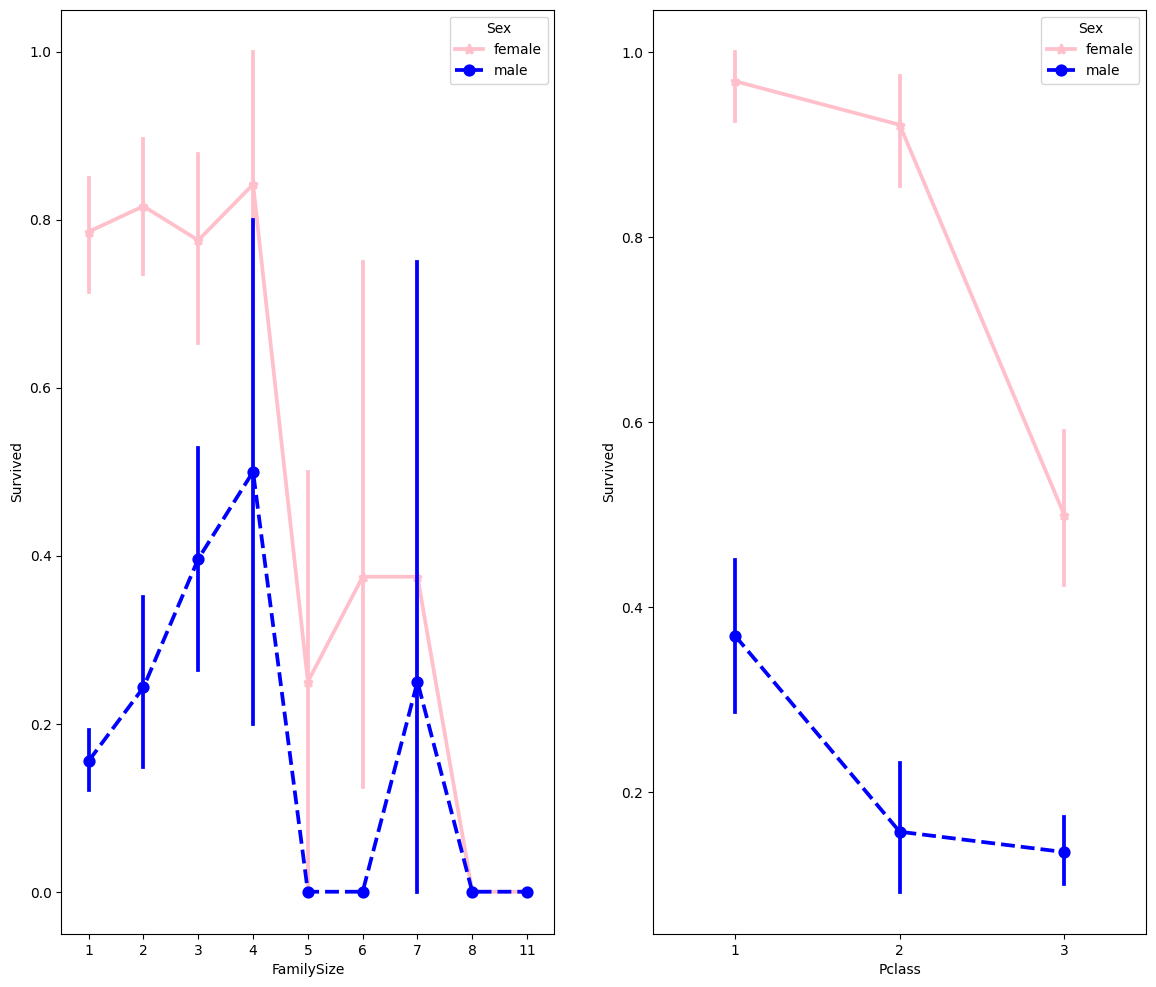

In [43]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


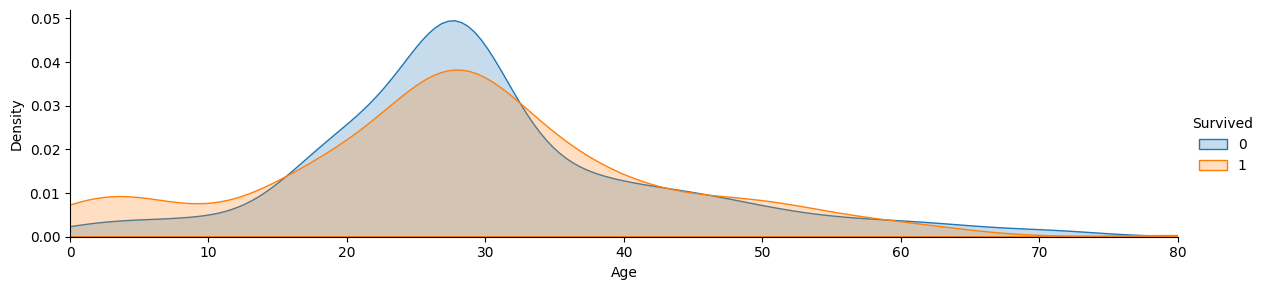

In [44]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

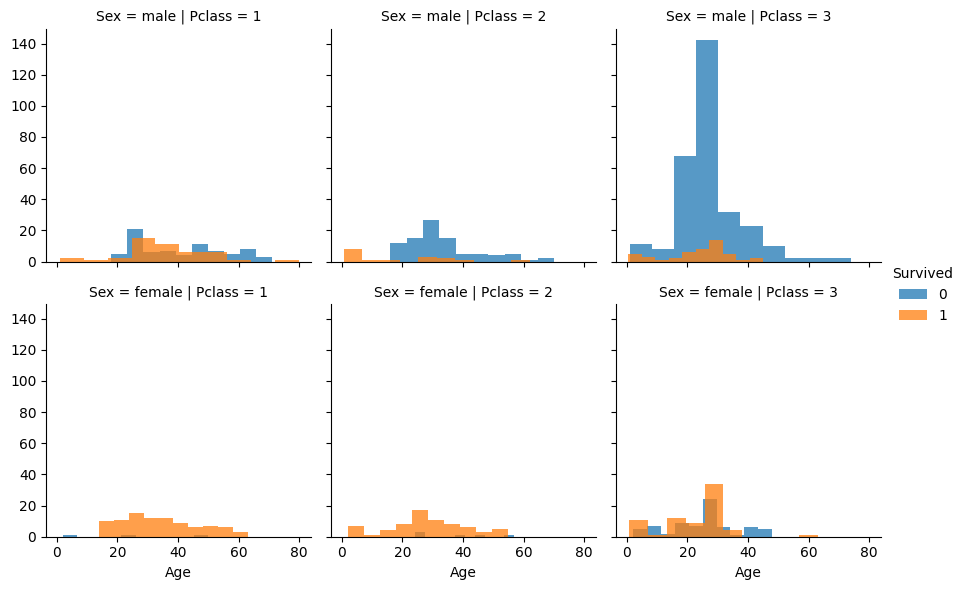

In [45]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

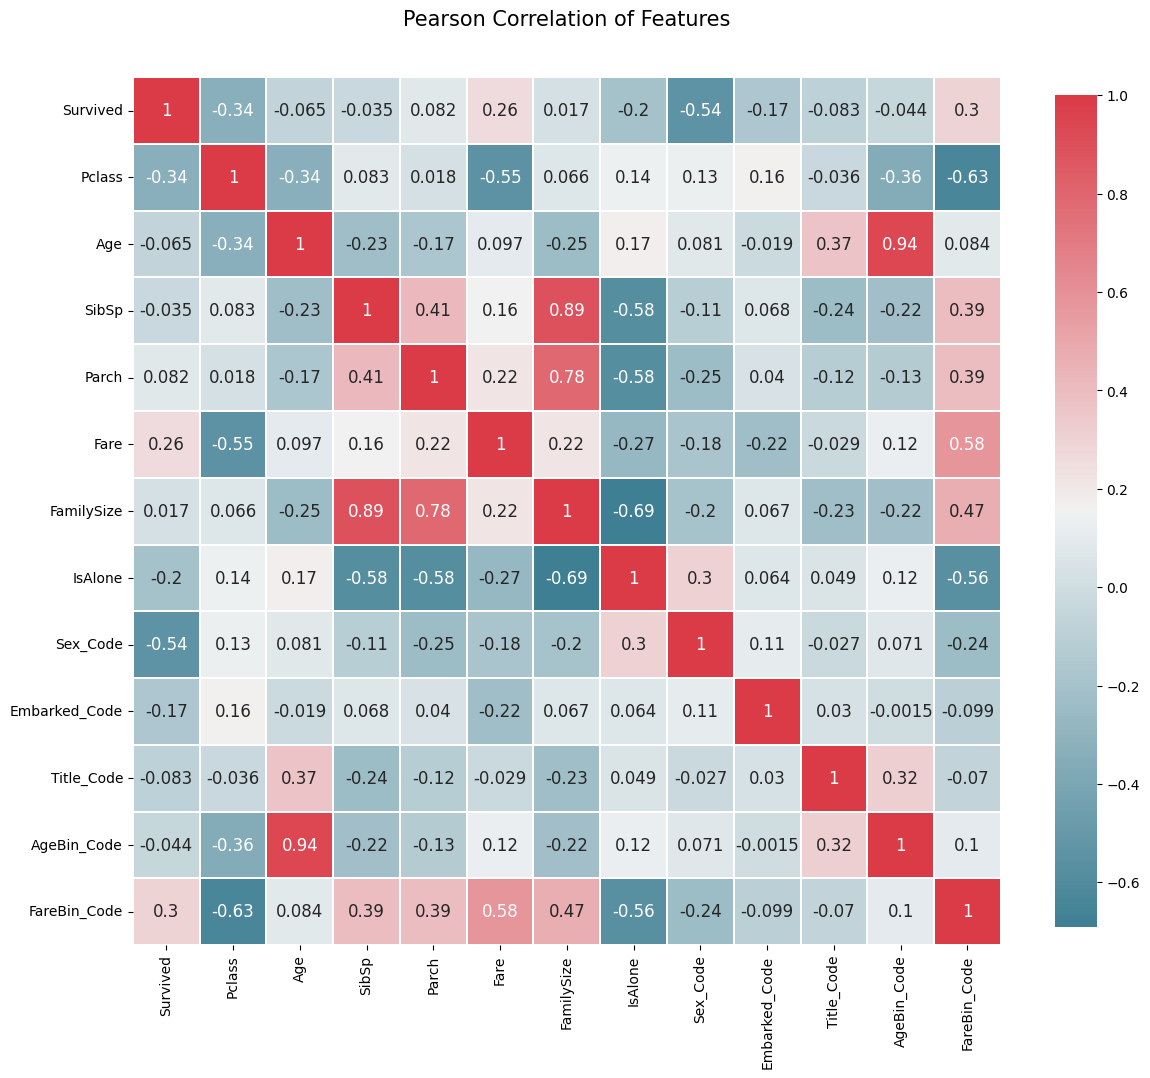

In [49]:
df_num = data1.select_dtypes(include=['number'])
def correlation_heatmap(df):
    # Calcula a matriz de correlação
    corr = df.corr()

    # Configuração da figura
    plt.figure(figsize=(14, 12))

    # Esquema de cores divergentes para o mapa de calor
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    # Cria o mapa de calor usando seaborn
    sns.heatmap(corr, cmap=colormap, square=True, cbar_kws={'shrink': .9}, annot=True,
                linewidths=0.1, vmax=1.0, linecolor='white', annot_kws={'fontsize': 12})

    # Adiciona título
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

    # Exibe o mapa de calor
    plt.show()

# Exemplo de uso com o dataframe data1
correlation_heatmap(df_num)


## Treinamento do modelo

A ideia principal da equipe foi gerar vários cenários empiricos com parâmetros diferentes para a mesma rede neural, no caso desse projeto foi abordado MLP.

No conjunto de redes, cada elemento pertencente assume uma peculiaridade específica. Neste trabalho foi análisado níveis de camada intermédiaria da rede, função de ativação, taxa de aprendizagem e solvers [1].

O grupo optou por seguir estritamente a documentação da função MLP da biblioteca sugerida para o projeto. Assim foi implementado redes com as seguintes funções de ativação, taxa de aprendizagem e solver:

| Função de Ativação | Taxa de aprendizagem | Solver |
|--------------------|----------------------|--------|
| relu               | constant             | lbfgs  |
| tanh               | invscaling           | sgd    |
| identity           | adaptive             | adam   |
| logistic           |                      |        |

Para isso dividimos nas seguintes etapas:

- Geração do conjunto de parâmetros;
- Geração de um "log" de resultados;
- Avaliação do conjunto de parâmetros.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Melhores parâmetros encontrados: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 1e-05, 'learning_rate_init': 0.001, 'solver': 'adam'}
Acurácia: 0.8295964125560538
Precisão: 0.8026315789473685
Recall: 0.7261904761904762


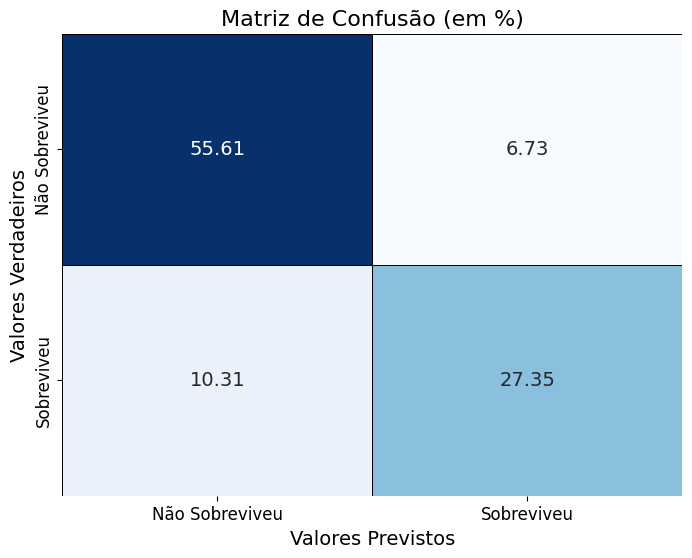

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import itertools


# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train1_x, test1_x, train1_y, test1_y

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Definir listas de parâmetros para variar manualmente
hidden_layer_sizes = [(50,),(100, 50)]
activations = ['identity', 'logistic', 'tanh', 'relu']
alphas = [1e-5, 1e-4]
learning_rate_inits = [1e-3, 1e-2]
solvers = ['sgd', 'adam']

# Variáveis para armazenar o melhor modelo e métricas associadas
best_model = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_conf_matrix = None
best_params = {}

# Loop pelas combinações de parâmetros
for params in itertools.product(hidden_layer_sizes, activations, alphas, learning_rate_inits, solvers):
    hidden_layer_size, activation, alpha, learning_rate_init, solver = params

    # Inicializar o modelo MLPClassifier com os parâmetros atuais
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        solver=solver,
        max_iter=1000,
        random_state=0
    )

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Avaliar o modelo no conjunto de teste
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Comparar com o melhor modelo encontrado até agora
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_conf_matrix = conf_matrix
        best_model = model
        best_params = {
            'hidden_layer_sizes': hidden_layer_size,
            'activation': activation,
            'alpha': alpha,
            'learning_rate_init': learning_rate_init,
            'solver': solver
        }

# Calcular porcentagem de cada célula em relação ao total de predições
total_predictions = np.sum(best_conf_matrix)
best_conf_matrix_percent = (best_conf_matrix / total_predictions) * 100

# Imprimir os resultados da melhor combinação encontrada
print("Melhores parâmetros encontrados:", best_params)
print("Acurácia:", best_accuracy)
print("Precisão:", best_precision)
print("Recall:", best_recall)

# Plot da matriz de confusão da melhor combinação encontrada (em porcentagem)
plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='black')

plt.title('Matriz de Confusão (em %)', fontsize=16)
plt.xlabel('Valores Previstos', fontsize=14)
plt.ylabel('Valores Verdadeiros', fontsize=14)
plt.xticks(np.arange(2) + 0.5, ['Não Sobreviveu', 'Sobreviveu'], fontsize=12)
plt.yticks(np.arange(2) + 0.5, ['Não Sobreviveu', 'Sobreviveu'], fontsize=12)
plt.show()


Referências Bibliograficas:

[1] SCIKIT-LEARN. Multi-layer Perceptron classifier. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. Acesso em: 24/06/2024.

[2] BISHOP, Christopher M. Pattern Recognition and Machine Learning. 1. ed. New York: Springer, 2006. ISBN 978-0-387-31073-2.

[3] GOODFELLOW, Ian; BENGIO, Yoshua; COURVILLE, Aaron. Deep Learning. 1. ed. Cambridge: MIT Press, 2016. ISBN 978-0-262-03561-3.

[4] PEDREGOSA, Fabian et al. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, v. 12, p. 2825-2830, 2011. Disponível em: http://jmlr.csail.mit.edu/papers/volume12/pedregosa11a/pedregosa11a.pdf. Acesso em: 24/06/2024.